In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import folium
import json
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [37]:
path =r'Desktop/CF/Achievement 6/Data Sets/NYPD_cleaned.pkl'
path1 = r'Desktop/CF/Achievement 6/Data Sets/NYPD_New_Set.pkl'
path2 = r'Desktop/CF/Achievement 6/Data Sets/Crimes_by_Prec.pkl'
path_orig = r'Desktop/CF/Achievement 6/Data Sets'

In [20]:
df = pd.read_pickle(os.path.join(path))
df1 = pd.read_pickle(os.path.join(path1))
df2 = pd.read_pickle(os.path.join(path2))

In [21]:
df.head()

,ARREST_KEY,Offense_Category,Offense_Description,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Month,Year
0,236791704,Unknown,Unknown,M,28.0,0.0,45-64,M,BLACK,40.799009,-73.952409,11.0,2021.0
1,237354740,RAPE 3,RAPE,B,41.0,0.0,25-44,M,WHITE HISPANIC,40.816392,-73.895296,12.0,2021.0
2,236081433,"CHILD, ENDANGERING WELFARE",SEX CRIMES,Q,113.0,0.0,25-44,M,BLACK,40.679700,-73.776047,11.0,2021.0
4,192799737,SEXUAL ABUSE,SEX CRIMES,M,25.0,0.0,45-64,M,BLACK,40.800694,-73.941109,1.0,2019.0
5,193260691,Unknown,Unknown,M,14.0,0.0,25-44,M,UNKNOWN,40.757839,-73.991212,2.0,2019.0


In [22]:
df['Year'].value_counts()

Year
2006.0    250868
2018.0    246773
2019.0    214617
2021.0    155507
2020.0    140413
2017.0     35458
2012.0       747
2011.0       692
2014.0       678
2013.0       673
2010.0       655
2008.0       594
2009.0       577
2015.0       575
2007.0       571
2016.0       570
Name: count, dtype: int64

In [23]:
df['DATE'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [24]:
df = df.loc[(df ['DATE'] >= '2017-01-01') & (df ['DATE'] < '2021-06-01')]

In [25]:
df.head()

,ARREST_KEY,Offense_Category,Offense_Description,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Month,Year,DATE
4,192799737,SEXUAL ABUSE,SEX CRIMES,M,25.0,0.0,45-64,M,BLACK,40.800694,-73.941109,1.0,2019.0,2019-01-01
5,193260691,Unknown,Unknown,M,14.0,0.0,25-44,M,UNKNOWN,40.757839,-73.991212,2.0,2019.0,2019-02-01
11,221756278,Unknown,Unknown,M,23.0,0.0,25-44,M,WHITE HISPANIC,40.787567,-73.943132,12.0,2020.0,2020-12-01
13,190049060,RAPE 1,RAPE,K,77.0,0.0,25-44,M,BLACK,40.674583,-73.930222,11.0,2018.0,2018-11-01
15,221870158,"FACILITATION 4, CRIMINAL",ANTICIPATORY OFFENSES,K,75.0,0.0,45-64,F,BLACK,40.672763,-73.872043,12.0,2020.0,2020-12-01


In [26]:
df['Year'].value_counts()

Year
2018.0    246773
2019.0    214617
2020.0    140413
2021.0     61385
2017.0     35458
Name: count, dtype: int64

In [28]:
df.isnull().sum()

ARREST_KEY             0
Offense_Category       0
Offense_Description    0
ARREST_BORO            0
ARREST_PRECINCT        0
JURISDICTION_CODE      0
AGE_GROUP              0
PERP_SEX               0
PERP_RACE              0
Latitude               0
Longitude              0
Month                  0
Year                   0
DATE                   0
dtype: int64

In [31]:
df_dups = df[df.duplicated()]
df_dups.shape

(0, 14)

In [33]:
df['AGE_GROUP'].value_counts()

AGE_GROUP
25-44    373802
18-24    144799
45-64    138929
<18       32017
65+        9099
Name: count, dtype: int64

In [34]:
df['Month'].replace(12.0,'Dec',inplace=True)
df['Month'].replace(11.0,'Nov',inplace=True)
df['Month'].replace(1.0,'Jan',inplace=True)
df['Month'].replace(2.0,'Feb',inplace=True)
df['Month'].replace(3.0,'Mar',inplace=True)
df['Month'].replace(4.0,'Apr',inplace=True)
df['Month'].replace(5.0,'May',inplace=True)
df['Month'].replace(6.0,'Jun',inplace=True)
df['Month'].replace(7.0,'Jul',inplace=True)
df['Month'].replace(8.0,'Aug',inplace=True)
df['Month'].replace(9.0,'Sep',inplace=True)
df['Month'].replace(10.0,'Oct',inplace=True)

In [35]:
df['Month'].value_counts()

Month
Jan    73687
Mar    69339
May    67033
Feb    66591
Dec    63858
Nov    59324
Apr    59292
Oct    50505
Aug    49343
Jul    47951
Sep    46541
Jun    45182
Name: count, dtype: int64

In [41]:
df['ARREST_BORO'].replace('M','Manhattan',inplace=True)
df['ARREST_BORO'].replace('B','Bronx',inplace=True)
df['ARREST_BORO'].replace('K','Brooklyn',inplace=True)
df['ARREST_BORO'].replace('Q','Queens',inplace=True)
df['ARREST_BORO'].replace('S','Staten Island',inplace=True)

In [42]:
df.to_csv(os.path.join(path_orig, 'df_orig.csv'))

In [43]:
df1.head()

,Year,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,ARREST_KEY,Crime_Frequency,Age_Code
0,2018.0,Bronx,40.0,18-24,1469,Mid Frequency,2.0
1,2018.0,Bronx,40.0,25-44,3563,High Frequency,3.0
2,2018.0,Bronx,40.0,45-64,1313,Mid Frequency,4.0
3,2018.0,Bronx,40.0,65+,45,Low Frequency,5.0
4,2018.0,Bronx,40.0,Under 18,340,Low Frequency,1.0


In [44]:
df1.to_csv(os.path.join(path_orig, 'df_1.csv'))

In [45]:
df2.head()

Law_Cat,ARREST_PRECINCT,ADMINISTRATIVE CODE,ALCOHOLIC BEVERAGE CONTROL LAW,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL MISCHIEF & RELATED OFFENSES,CRIMINAL TRESPASS,DANGEROUS DRUGS,...,POSSESSION OF STOLEN PROPERTY 5,PROSTITUTION & RELATED OFFENSES,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNAUTHORIZED USE OF A VEHICLE 3 (UUV),Unknown,VEHICLE AND TRAFFIC LAWS
0,1.0,1,1,923,85,426,635,260,208,218,...,469,20,24,304,113,63,9,7,76,355
1,5.0,14,19,1193,34,543,566,302,307,1001,...,119,127,148,572,490,263,9,5,90,475
2,6.0,11,1,947,131,538,297,188,282,2001,...,219,209,10,943,89,7,5,4,11,179
3,7.0,2,3,1359,40,316,356,212,520,1119,...,84,26,11,429,90,23,2,12,45,753
4,9.0,3,1,1266,88,447,262,240,470,1612,...,309,30,22,385,98,35,4,4,21,331


In [56]:
df2.to_csv(os.path.join(path_orig, 'df_2.csv'))

In [74]:
df2.head()

Law_Cat,ARREST_PRECINCT,ADMINISTRATIVE CODE,ALCOHOLIC BEVERAGE CONTROL LAW,ASSAULT 3 & RELATED OFFENSES,BURGLAR'S TOOLS,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL MISCHIEF & RELATED OFFENSES,CRIMINAL TRESPASS,DANGEROUS DRUGS,...,POSSESSION OF STOLEN PROPERTY 5,PROSTITUTION & RELATED OFFENSES,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,UNAUTHORIZED USE OF A VEHICLE 3 (UUV),Unknown,VEHICLE AND TRAFFIC LAWS
0,1.0,1,1,923,85,426,635,260,208,218,...,469,20,24,304,113,63,9,7,76,355
1,5.0,14,19,1193,34,543,566,302,307,1001,...,119,127,148,572,490,263,9,5,90,475
2,6.0,11,1,947,131,538,297,188,282,2001,...,219,209,10,943,89,7,5,4,11,179
3,7.0,2,3,1359,40,316,356,212,520,1119,...,84,26,11,429,90,23,2,12,45,753
4,9.0,3,1,1266,88,447,262,240,470,1612,...,309,30,22,385,98,35,4,4,21,331


In [64]:
%matplotlib inline

In [77]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 


In [78]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [79]:
kmeans = KMeans(n_clusters = 3)

In [82]:
kmeans.fit(df2)

df2['clusters'] = kmeans.fit_predict(df2)

df2['clusters'].value_counts()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


clusters
0    42
2    26
1     9
Name: count, dtype: int64

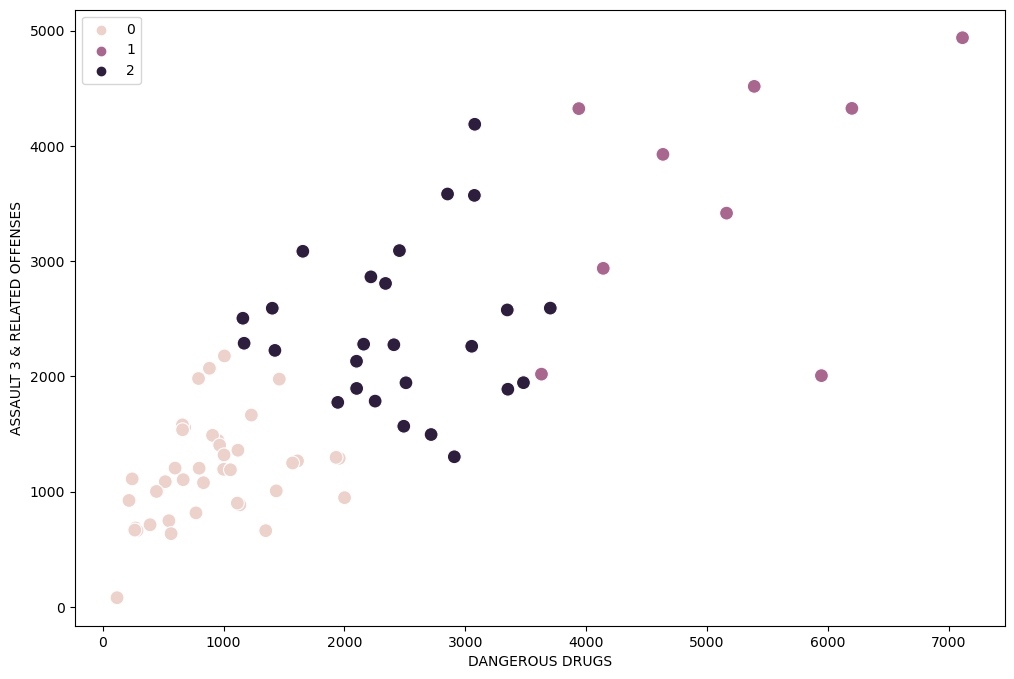

In [84]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['DANGEROUS DRUGS'], y=df2['ASSAULT 3 & RELATED OFFENSES'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('DANGEROUS DRUGS') 
plt.ylabel('ASSAULT 3 & RELATED OFFENSES') 
plt.show()


In [86]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

df2.groupby('cluster').agg({'ASSAULT 3 & RELATED OFFENSES':['mean', 'median'], 
                         'DANGEROUS DRUGS':['mean', 'median'], 
                         'GRAND LARCENY OF MOTOR VEHICLE':['mean', 'median'],
                          'VEHICLE AND TRAFFIC LAWS':['mean', 'median']})

Law_Cat     ASSAULT 3 & RELATED OFFENSES         DANGEROUS DRUGS          \
                                    mean  median            mean  median   
cluster                                                                    
dark purple                  2403.807692  2276.5     2437.076923  2432.0   
pink                         1162.285714  1149.5      875.238095   816.0   
purple                       3600.666667  3926.0     5128.111111  5161.0   

Law_Cat     GRAND LARCENY OF MOTOR VEHICLE        VEHICLE AND TRAFFIC LAWS  \
                                      mean median                     mean   
cluster                                                                      
dark purple                     100.076923   86.0               842.961538   
pink                             39.738095   34.0               462.261905   
purple                          139.444444  139.0               964.333333   

Law_Cat             
            median  
cluster             
dark purple  765.5  
pink         449.5  
purple       908.0

In [87]:
df2.to_csv(os.path.join(path_orig, 'df_2.csv'))

In [88]:
df.head()

,ARREST_KEY,Offense_Category,Offense_Description,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Month,Year,DATE
4,192799737,SEXUAL ABUSE,SEX CRIMES,Manhattan,25.0,0.0,45-64,M,BLACK,40.800694,-73.941109,Jan,2019.0,2019-01-01
5,193260691,Unknown,Unknown,Manhattan,14.0,0.0,25-44,M,UNKNOWN,40.757839,-73.991212,Feb,2019.0,2019-02-01
11,221756278,Unknown,Unknown,Manhattan,23.0,0.0,25-44,M,WHITE HISPANIC,40.787567,-73.943132,Dec,2020.0,2020-12-01
13,190049060,RAPE 1,RAPE,Brooklyn,77.0,0.0,25-44,M,BLACK,40.674583,-73.930222,Nov,2018.0,2018-11-01
15,221870158,"FACILITATION 4, CRIMINAL",ANTICIPATORY OFFENSES,Brooklyn,75.0,0.0,45-64,F,BLACK,40.672763,-73.872043,Dec,2020.0,2020-12-01


In [89]:
Grouped_Data= df.groupby(['ARREST_BORO','ARREST_PRECINCT','Offense_Category'])['ARREST_KEY'].count()

In [90]:
Grouped_Data

ARREST_BORO    ARREST_PRECINCT  Offense_Category               
Bronx          10.0             CONTEMPT,CRIMINAL                   1
               40.0             ADM.CODE,UNCLASSIFIED MISDEMEA      1
                                AGGRAVATED CRIMINAL CONTEMPT       14
                                AGGRAVATED GRAND LARCENY OF ATM     2
                                AGGRAVATED HARASSMENT 1             1
                                                                   ..
Staten Island  123.0            Unknown                             4
                                VEHICULAR ASSAULT (INTOX DRIVE      1
                                WEAPONS POSSESSION 1 & 2           31
                                WEAPONS POSSESSION 3               32
                                WEAPONS, POSSESSION, ETC           39
Name: ARREST_KEY, Length: 14566, dtype: int64

In [91]:
dt= Grouped_Data.reset_index()

In [93]:
dt.head()

,ARREST_BORO,ARREST_PRECINCT,Offense_Category,ARREST_KEY
0,Bronx,10.0,"CONTEMPT,CRIMINAL",1
1,Bronx,40.0,"ADM.CODE,UNCLASSIFIED MISDEMEA",1
2,Bronx,40.0,AGGRAVATED CRIMINAL CONTEMPT,14
3,Bronx,40.0,AGGRAVATED GRAND LARCENY OF ATM,2
4,Bronx,40.0,AGGRAVATED HARASSMENT 1,1


In [105]:
dt.rename(columns = {'ARREST_KEY' : 'Count of Arrests'}, inplace = True )

In [106]:
dt.head()

,ARREST_BORO,ARREST_PRECINCT,Offense_Category,Count of Arrests
0,Bronx,10.0,"CONTEMPT,CRIMINAL",1
1,Bronx,40.0,"ADM.CODE,UNCLASSIFIED MISDEMEA",1
2,Bronx,40.0,AGGRAVATED CRIMINAL CONTEMPT,14
3,Bronx,40.0,AGGRAVATED GRAND LARCENY OF ATM,2
4,Bronx,40.0,AGGRAVATED HARASSMENT 1,1


In [107]:
dt.to_csv(os.path.join(path_orig, 'dt.csv'))

In [ ]:
G_D= df.groupby(['ARREST_BORO','ARREST_PRECINCT','Offense_Category'])['ARREST_KEY'].count()